# Random Forest Model for Quick, Draw!

In [2]:
import requests
import numpy as np
from io import BytesIO
import pickle
import pandas as pd

## Part 1: Import Data

In [ ]:
for i, (key, value) in enumerate(classes_dict.items()):
    value = value.astype('float32')/255.
    if i == 0:
        classes_dict[key] = np.c_[value, np.zeros(len(value))]
    else:
        classes_dict[key] = np.c_[value,i*np.ones(len(value))]

label_dict = {0:'mouse', 1:'ant', 2:'bear', 3:'bee', 4:'sea turtle', 5:'cat', 6:'crab', 7:'dragon', 8:'elephant', 9:'snail'}

In [7]:
with open('xtrain_doodle.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('xtest_doodle.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('ytrain_doodle.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('ytest_doodle.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [4]:
X_train = pd.DataFrame(X_train)

In [30]:
X_train.shape

(24000, 784)

In [31]:
X_test.shape

(6000, 784)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Part 2: Random Search CV for Random Forest

### Set the Parameter Space

In [3]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [5]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


### Use the Random Search for Best Parameters

In [8]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80 
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total= 2.1min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total= 3.1min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, total= 3.1min
[CV]  n_estimat

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.2min


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, total= 2.5min
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, total= 2.5min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80 
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=60, total= 1.3min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, total= 3.3min
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=20, total= 2.5min
[CV] n_estimators=800, min_samples_split=2, m

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=70, total=  21.5s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=80, total= 3.1min
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=80, total= 3.1min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, total= 1.2min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=90, total= 1.2min
[CV] n_estimators=1000, min_samples_split=10

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total= 3.4min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total= 3.4min
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=60, total= 2.3min
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total= 3.5min
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, total=  16.3s
[CV] n_estimators=100, min_samples_split=5, mi

[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total= 2.8min
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, total= 2.8min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, total= 2.2min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 68.0min


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, total=  42.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, total=  42.2s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, total=  41.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, total= 2.2min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, total= 2.2min
[CV] n_estimators=300, min_samples_split=5, min

[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, total= 1.2min
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=  21.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=  21.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=40, total=  21.4s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, total= 1.2min
[CV] n_estimators=200, min_samples_split=5, min_sa

[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=  37.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=  37.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=  21.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=  21.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=

[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, total= 1.7min
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, total=  21.4s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, total=  21.1s
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=60 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, total= 1.7min
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=80 
[CV]  n_estimators=300, min_samples_split=2, min_samples_lea

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 133.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [15]:
# The best parameters
print(rf_random.best_params_)

{'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}


In [204]:
target_names = ['mouse', 'ant', 'bear', 'bee', 'sea turtle', 'cat', 'crab', 'dragon', 'elephant', 'snail']

In [232]:
# set the model with the best parameters
rf = RandomForestClassifier(n_estimators = 900, min_samples_split = 2, min_samples_leaf= 1, max_features ='sqrt', max_depth = 50,random_state = 42)

### Fit and Predict

In [233]:
# fit random forest model
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [234]:
# predict the test set
preds = rf.predict(X_test)

In [259]:
# print the result
print("Classification report for classifier %s:\n%s\n"
% (rf, classification_report(y_test, preds, target_names = target_names)))
cm = confusion_matrix(y_test, preds)
print("Accuracy={}".format(accuracy_score(y_test, preds)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False):
             precision    recall  f1-score   support

      mouse       0.64      0.58      0.61       645
        ant       0.56      0.60      0.58       611
       bear       0.51      0.67      0.58       615
        bee       0.66      0.46      0.54       594
 sea turtle       0.64      0.63      0.64       565
        cat       0.43      0.42      0.43       582
       crab       0.58      0.58      0.58       616
     dragon       0.63      0.60      0.62       593
   elephant       0.54      0.53      0.54       559
      snail       0.69   

### Plot Confusion Matrix

In [247]:
def plot_confusion_matrix(cm, classes,axis_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 35)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, axis_labels, rotation=-30,fontsize=15)
    plt.yticks(tick_marks, axis_labels, fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize = 20)
    plt.xlabel('Predicted label',fontsize = 20)
    plt.tight_layout()

Confusion matrix, without normalization
[[371  10  66   6  23  60  49  34  15  11]
 [ 14 364  30  34  20  17  44  34  42  12]
 [ 28  19 414  21   7  36  12   5  12  61]
 [ 28  50  61 272  51  30  21  24  24  33]
 [ 21  19  18  18 358  45  16  12  49   9]
 [ 46  41  66  20  32 245  39  38  27  28]
 [ 19  42  32   8  13  49 356  26  47  24]
 [ 25  65  10  15  22  25  30 357  26  18]
 [ 14  24  80   8  26  31  36  24 298  18]
 [ 11  19  34  12   6  28  13  13  15 469]]


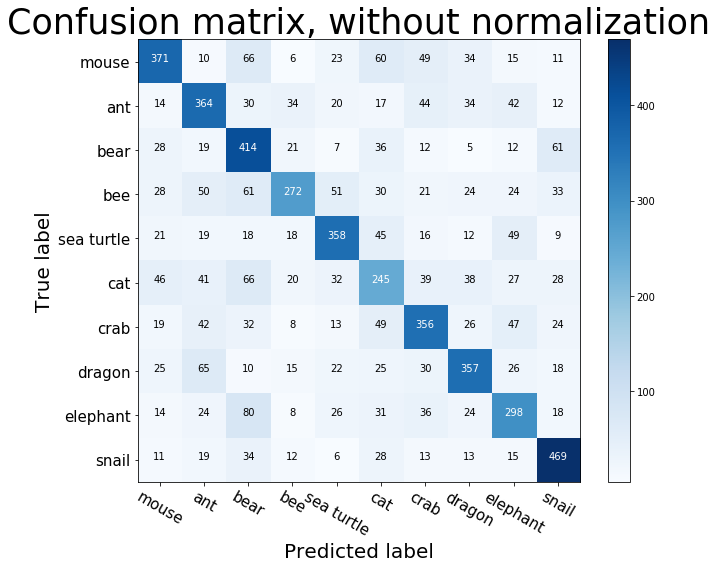

In [253]:
#Compute confusion matrix
import itertools

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cm, classes=[i for i in range(10)],axis_labels = np.array(target_names),
                      title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[0.58 0.02 0.1  0.01 0.04 0.09 0.08 0.05 0.02 0.02]
 [0.02 0.6  0.05 0.06 0.03 0.03 0.07 0.06 0.07 0.02]
 [0.05 0.03 0.67 0.03 0.01 0.06 0.02 0.01 0.02 0.1 ]
 [0.05 0.08 0.1  0.46 0.09 0.05 0.04 0.04 0.04 0.06]
 [0.04 0.03 0.03 0.03 0.63 0.08 0.03 0.02 0.09 0.02]
 [0.08 0.07 0.11 0.03 0.05 0.42 0.07 0.07 0.05 0.05]
 [0.03 0.07 0.05 0.01 0.02 0.08 0.58 0.04 0.08 0.04]
 [0.04 0.11 0.02 0.03 0.04 0.04 0.05 0.6  0.04 0.03]
 [0.03 0.04 0.14 0.01 0.05 0.06 0.06 0.04 0.53 0.03]
 [0.02 0.03 0.05 0.02 0.01 0.05 0.02 0.02 0.02 0.76]]


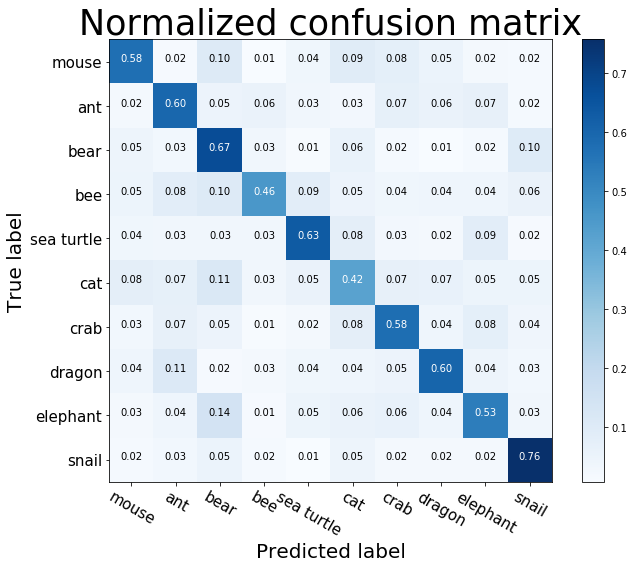

In [251]:
# Plot normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cm, axis_labels=target_names,classes=[i for i in range(10)], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Part 3: Default Random Forest Model Comparison

In [34]:
rf_base = RandomForestClassifier()

In [35]:
rf_base.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
preds_base = rf_base.predict(X_test)

In [255]:
# print the result
print("Classification report for classifier %s:\n%s\n"
% (rf_base, classification_report(y_test, preds_base, target_names = target_names)))
cm_base = confusion_matrix(y_test, preds_base)
print("Accuracy={}".format(accuracy_score(y_test, preds_base)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      mouse       0.30      0.42      0.35       645
        ant       0.39      0.51      0.44       611
       bear       0.40      0.48      0.44       615
        bee       0.39      0.35      0.37       594
 sea turtle       0.44      0.45      0.44       565
        cat       0.28      0.24      0.26       582
       crab       0.36      0.31      0.33       616
     dragon       0.52      0.46      0.48       593
   elephant       0.43      0.33      0.37       559
      snai

### Plot Confusion Matrix

Confusion matrix, without normalization
[[270  41  44  29  45  78  47  46  26  19]
 [ 35 312  34  59  20  18  41  42  40  10]
 [ 68  47 293  40  11  44  28  14  22  48]
 [ 65  82  59 209  54  24  26  21  19  35]
 [ 75  33  27  40 253  42  29  20  39   7]
 [113  44  63  32  47 142  45  38  27  31]
 [ 99  74  56  29  33  56 188  28  34  19]
 [ 67  68  14  24  38  39  29 271  27  16]
 [ 43  70  59  39  53  40  37  23 185  10]
 [ 61  25  80  33  21  26  47  22  15 290]]


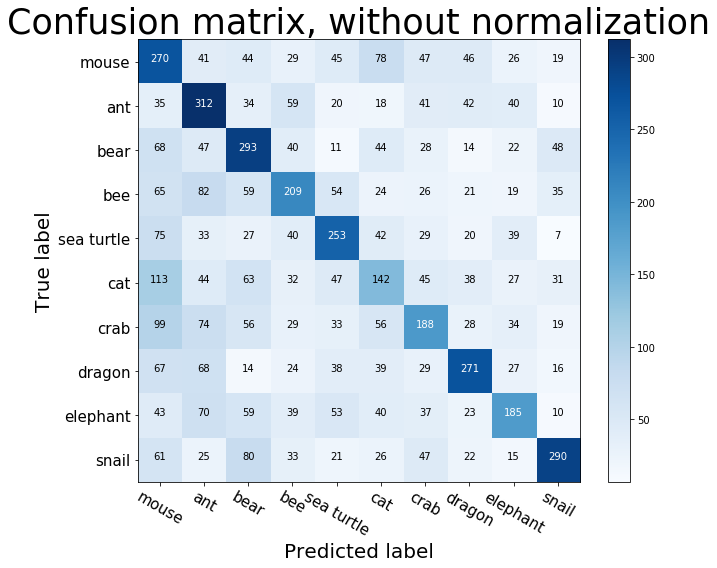

In [256]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cm_base, classes=[i for i in range(10)],axis_labels = np.array(target_names),
                      title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[0.42 0.06 0.07 0.04 0.07 0.12 0.07 0.07 0.04 0.03]
 [0.06 0.51 0.06 0.1  0.03 0.03 0.07 0.07 0.07 0.02]
 [0.11 0.08 0.48 0.07 0.02 0.07 0.05 0.02 0.04 0.08]
 [0.11 0.14 0.1  0.35 0.09 0.04 0.04 0.04 0.03 0.06]
 [0.13 0.06 0.05 0.07 0.45 0.07 0.05 0.04 0.07 0.01]
 [0.19 0.08 0.11 0.05 0.08 0.24 0.08 0.07 0.05 0.05]
 [0.16 0.12 0.09 0.05 0.05 0.09 0.31 0.05 0.06 0.03]
 [0.11 0.11 0.02 0.04 0.06 0.07 0.05 0.46 0.05 0.03]
 [0.08 0.13 0.11 0.07 0.09 0.07 0.07 0.04 0.33 0.02]
 [0.1  0.04 0.13 0.05 0.03 0.04 0.08 0.04 0.02 0.47]]


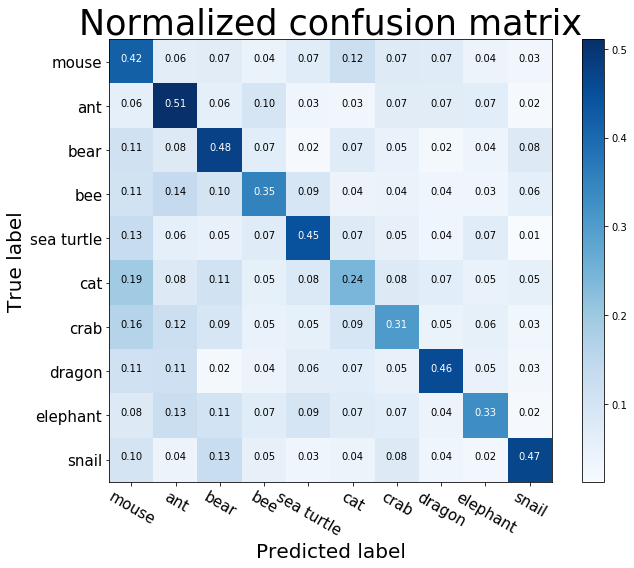

In [257]:
# Plot normalized confusion matrix
plt.figure(figsize = (10,8))
plot_confusion_matrix(cm_base, axis_labels=target_names,classes=[i for i in range(10)], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Part 4: ROC and PR Curve

###  ROC Curve

In [92]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

In [272]:
def ROC_curve_comp(y_test_new, probas, n_classes = 10):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_new[:,i], probas[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_new.ravel(), probas.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    return fpr, tpr, roc_auc

In [270]:
def plot_ROC(fpr, tpr, roc_auc):
    # Plot all ROC curves
    plt.figure(figsize=(6, 5))
    plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='black', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, 
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(target_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right", prop=dict(size=8))
    plt.show()

**For random search model**

In [264]:
fpr[0].shape

(289,)

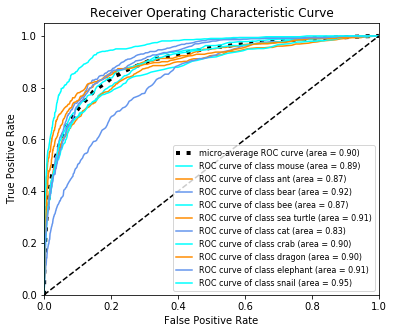

In [274]:
probas_ = rf.predict_proba(X_test)
y_test_new = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
fpr, tpr, roc_auc = ROC_curve_comp(y_test_new, probas_, n_classes = 10)
plot_ROC(fpr, tpr, roc_auc)

** For base model**

0.7735906141975308


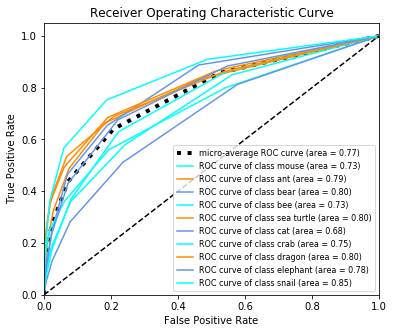

In [275]:
base_probas_ = rf_base.predict_proba(X_test)
fpr_base, tpr_base,roc_auc_base = ROC_curve_comp(y_test_new, base_probas_, n_classes = 10)
print(roc_auc_base['micro'])
plot_ROC(fpr_base,tpr_base, roc_auc_base)

### PR Curve 

In [200]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Obtain the precision, recall and average_precision
def PR_curve_comp(y_test_new, probas_, n_classes = 10):
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_new[:, i],
                                                            probas_[:, i])
        average_precision[i] = average_precision_score(y_test_new[:, i], probas_[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_new.ravel(),
       probas_.ravel())
    average_precision["micro"] = average_precision_score(y_test_new, probas_,
                                                         average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))
    
    return precision, recall, average_precision

In [223]:
def plot_PR(precision, recall, average_precision):
    plt.figure(figsize=(6,6))

    lines = []
    labels = []
    l, = plt.plot(recall["micro"], precision["micro"], 
             color='black', linestyle=':', linewidth=4)
    
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))
    for i, color in zip(range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i])
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                      ''.format(target_names[i], average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(lines, labels, loc=(0, 0), prop=dict(size=8))

    plt.show()

**For random search model**

Average precision score, micro-averaged over all classes: 0.61


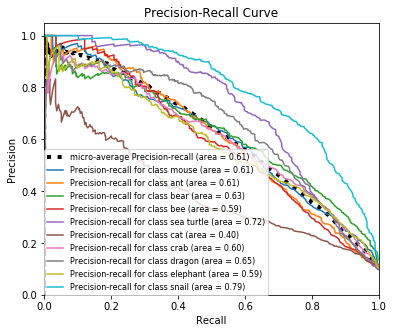

In [224]:
precision, recall, average_precision = PR_curve_comp(y_test_new, probas_, n_classes = 10)
plot_PR(precision, recall, average_precision)

** For base model**

Average precision score, micro-averaged over all classes: 0.36


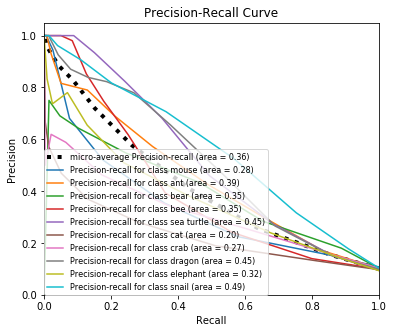

In [241]:
precision_base, recall_base, average_precision_base = PR_curve_comp(y_test_new, base_probas_, n_classes = 10)
plot_PR(precision_base, recall_base, average_precision_base)